Load the `ISLR2` and `tidyverse` packages.

In [1]:
library('tidyverse')
library('ISLR2')
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1  

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

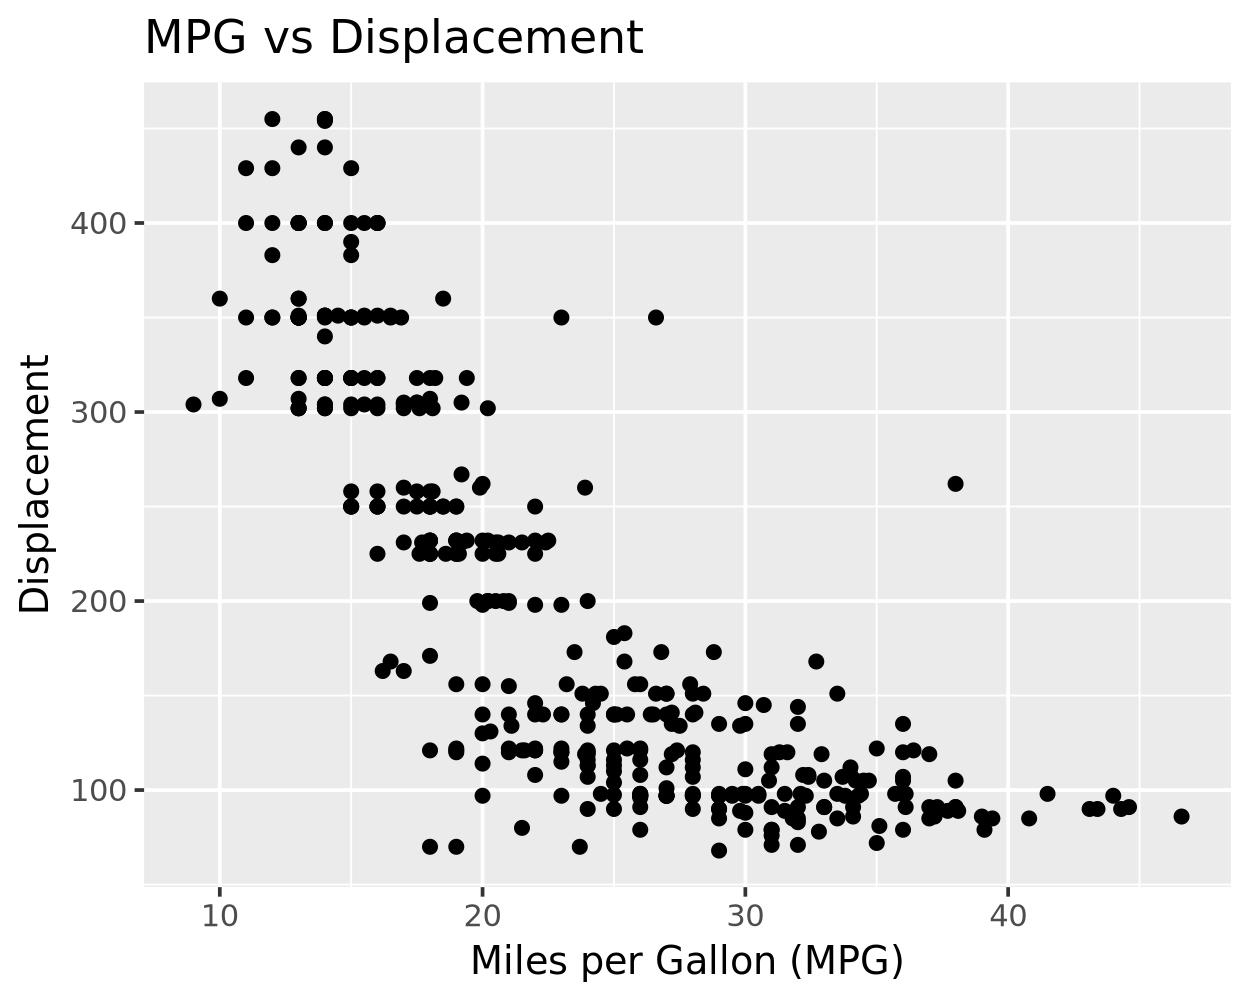

In [7]:
ggplot(Auto, aes(x = mpg, y = displacement)) +
    geom_point()+
    labs(title="MPG vs Displacement", x="Miles per Gallon (MPG)", y="Displacement")

❓Does the relationship of `mpg` to `displacement` look linear?

Answer: No

In [48]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_poly(displacement, degree = 2) |>  
  step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders) |>
prep()

In [49]:
mod = linear_reg() |> set_engine('lm')

In [50]:
wf = workflow() |>
    add_recipe(rec) |>
  add_model(mod)

wf_fit = wf |> fit(data = Auto)

ERROR: [1m[33mError[39m in `add_recipe()`:[22m
[33m![39m Can't add a trained recipe to a workflow.


In [38]:
Auto_pred = augment(wf_fit, new_data = Auto)

Auto_pred |> head()

.pred,.resid,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
15.68830,2.3116999,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
14.42986,0.5701386,15,8,350,165,3693,11.5,70,1,buick skylark 320
15.29744,2.7025623,18,8,318,150,3436,11.0,70,1,plymouth satellite
15.80312,0.1968758,16,8,304,150,3433,12.0,70,1,amc rebel sst
15.88163,1.1183679,17,8,302,140,3449,10.5,70,1,ford torino
14.00537,0.9946340,15,8,429,198,4341,10.0,70,1,ford galaxie 500


Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

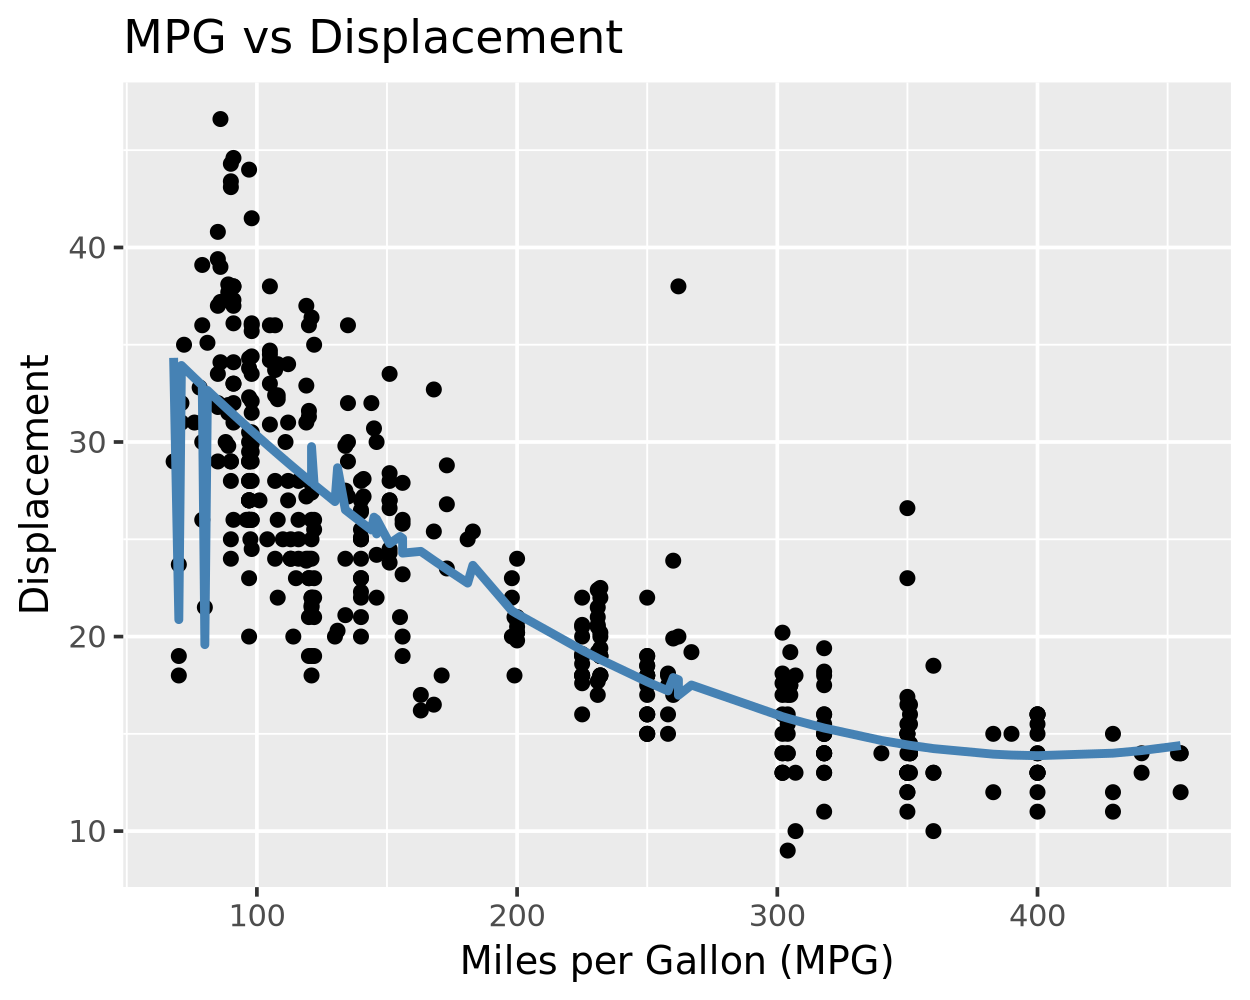

In [54]:
ggplot(Auto_pred) +
    geom_point(aes(x = displacement, y = mpg)) + 
    geom_line(aes(x = displacement, y = .pred), color = 'steelblue', linewidth = 1.2) +
    labs(title="MPG vs Displacement", x="Miles per Gallon (MPG)", y="Displacement")